<a href="https://colab.research.google.com/github/Monoxido45/Active_learning_tests/blob/master/trabalho_1_bicicletas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pacotes para pegar os dados da net
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2

# pacotes importados
import numpy as np
import pandas as pd

# para os graficos
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

Montando o drive e importando os dados de bicicleta:


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
# path para salvar as figuras
images_dir = '/content/gdrive/MyDrive/AM_trabalhos/figuras'

Mounted at /content/gdrive


In [ ]:
# lendo os dados
#bike_df = pd.read_csv('/content/gdrive/My Drive/AM_trabalhos/hour.csv', sep = ",")
#print(bike_df)
#bike_tudo = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip')
#print(df)

link_do_repo = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'

r = urllib2.urlopen(link_do_repo).read()
file = ZipFile(BytesIO(r))
dados_csv = file.open("hour.csv")
bike_df = pd.read_csv(dados_csv)

bike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Analisando as informações sumarizadas do banco de dados, verificando se há valores faltantes para cada variável:

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB



Com cada variável sendo:
1.  **instant** = indice de registro
2.  **dteday** = data em D/M/A
3.  **season** = estação do ano (1:inverno, 2:primavera, 3:verão, 4:outono)
4.  **yr** = ano (0:2011, 1:2012)
5.  **mnth** =  mês (1 até 12)
6.  **hr** = hora (0 até 23)
7.  **holiday** = dia é feriado ou não
8.  **weekday** = dia da semana
9.  **workinday** = se é dia útil (1) ou não (0)
10. **wheathersit** = tempo do dia, com os níveis:
    *   1: Tempo limpo, poucas nuvens, parcialmente nebuloso
    *   2: Névoa + nebuloso, Névoa + algumas nuvens, Névoa + poucas nuvens, Névoa
    *   3: Leve neve, Leve chuva e tempestade com nuvens espalhadas, Chuva leve e nuvens espalhadas
    *   4: Chuva pesada acompanhada de granizo, tempestade e névoa ou neve e nevoeiro
11. **temp**: Temperatura em celsius normalizada.
12. **atemp**: Sensação térmica em celsius normalizada.
13. **hum**: Humidade normalizada, dividida por 100.
14. **windspeed**: Velocidade do vento normalizada, divida por 67.
15. **casual**: Contagem de usuários casuais
16. **registered**: contagarem de usuários registrados
17. **cnt**: Contagem do total de biciletas alugadas, tanto por usuários casuais quanto registrados

Podemos inicialmente explorar os dados e realizar analises descritivas breves. É interessante notar que as únicas variáveis quantitativas são a temperatura, sensação térmica, humidade, velocidade do vento e as contagens de bicicletas alugadas. Podemos inicialmente verificar e analisar a variável resposta de interesse, averiguando sua distribuição de forma univariada e o número médio de bicicletas alugadas por dia:

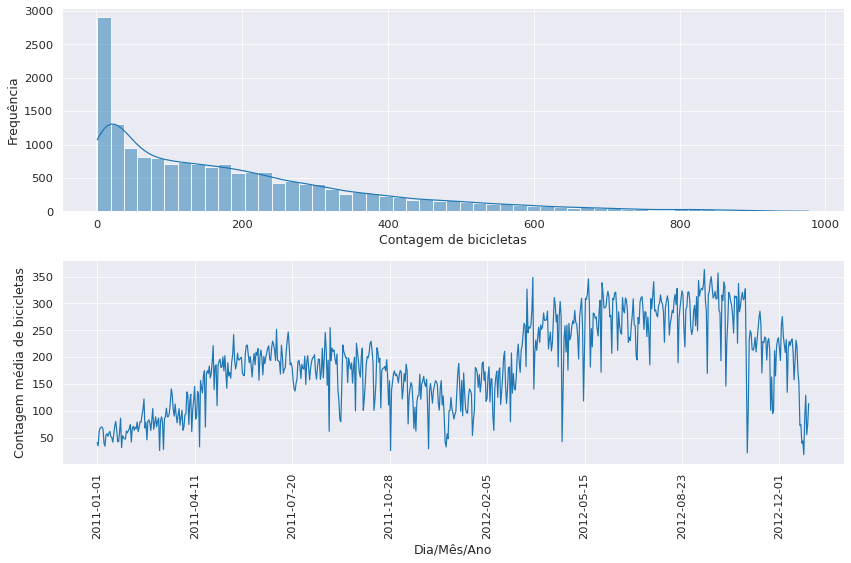

In [ ]:
# estilo usado
sns.set_context("paper", font_scale= 1.3)
sns.set_style("darkgrid")
sns.color_palette("Set1")

# contagem média por dia/mes/ano
series_cnt = bike_df.groupby('dteday')['cnt'].mean()
plt.figure(figsize = (12, 8))

plt.subplot(2, 1, 1)
# histograma acompanhado de uma estimativa de densidade por kernel
sns.histplot(data = bike_df, x = "cnt", kde = True, color = "tab:blue")
plt.ylabel("Frequência")
plt.xlabel("Contagem de bicicletas")

plt.subplot(2, 1, 2)
series_cnt.plot(color = "tab:blue")
plt.xlabel("Dia/Mês/Ano")
plt.xticks(rotation='vertical')
plt.ylabel("Contagem média de bicicletas")

plt.tight_layout()
plt.savefig(f"{images_dir}/bike_hist_cont.pdf")
plt.show()

Apenas o histograma:

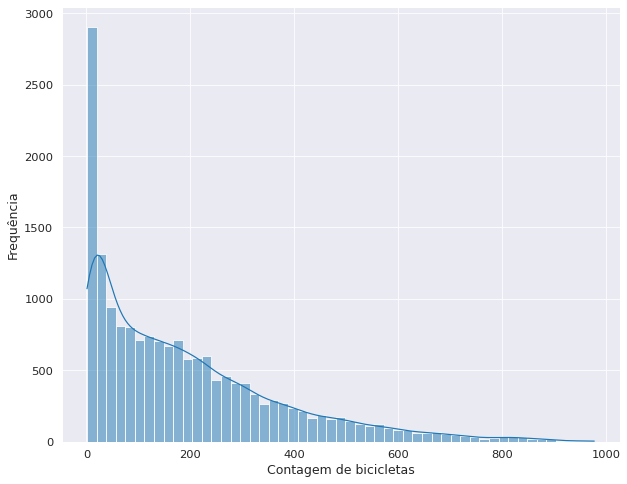

In [ ]:
plt.figure(figsize = (10, 8))
# histograma acompanhado de uma estimativa de densidade por kernel
sns.histplot(data = bike_df, x = "cnt", kde = True, color = "tab:blue")
plt.ylabel("Frequência")
plt.xlabel("Contagem de bicicletas")
plt.savefig(f"{images_dir}/bike_hist.pdf")
plt.show()

Vemos pelo gráfico acima que a maior parte da contagem de bicicletas é zero ou próximo de zero, o que faz sentido visto que durante certas horas do dia teremos pouco se não nenhum aluguel de bicicletas. Em outro aspecto, vemos que do ano de 2011 para o ano de 2012 houve um aumento do número de bicicletas alugadas por dia com maior crescimento de 05/2012 para 08/2012, havendo novamente um decrescimento mais ao fim do ano. Assim, após tal breve analise, vendo que não há nenhum valor absurdo ou ruído, seguimos para uma analise das variáveis quantitativas de forma conjunta, tendo a matriz de correlação de spearman:

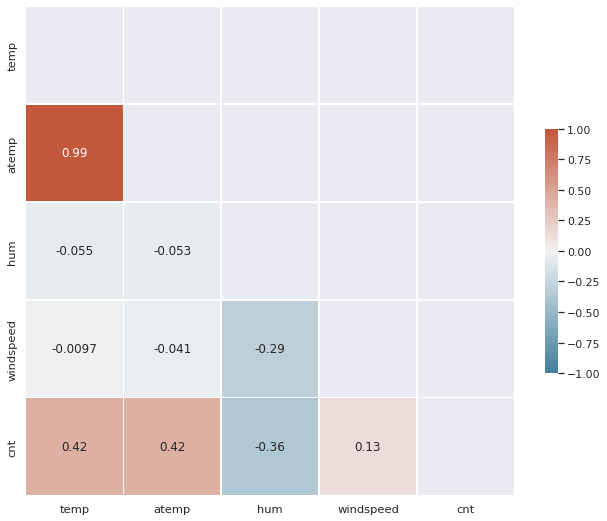

In [ ]:
quant_vars = bike_df.columns[[10, 11, 12, 13, 16]]
cor = bike_df[quant_vars].corr(method = 'spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cor, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.set_theme(style="white")
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=1, center=0, vmin = -1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.savefig(f"{images_dir}/corr_matrix.pdf")
plt.show()

Tal que temos os gráficos de dispersão entre a variável de contagem contra as variáveis:

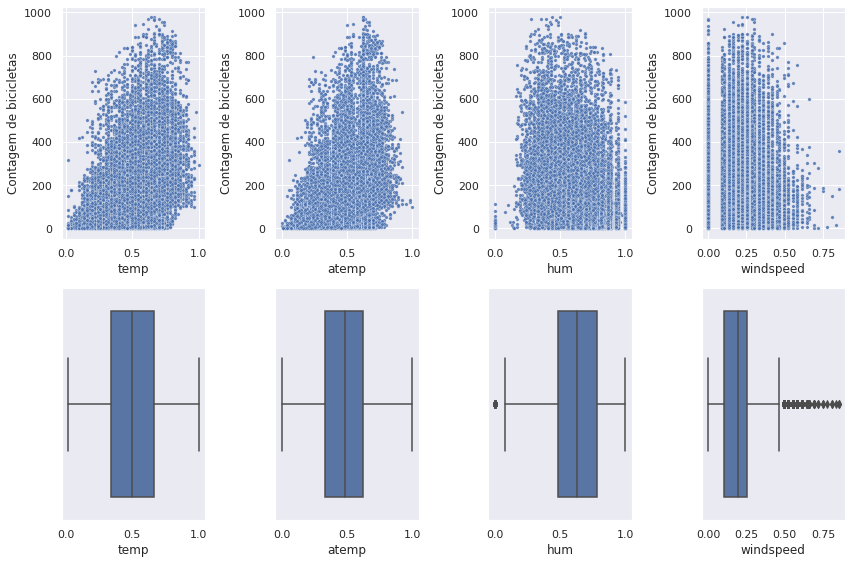

In [ ]:
plt.figure(figsize = (12, 8))
j = 1
for i in range(0, len(quant_vars) - 1):
  sns.set_style("darkgrid")
  plt.subplot(2, 4, j)
  sns.scatterplot(data = bike_df, x = quant_vars[i], y = "cnt", s = 12, alpha = 0.85)
  plt.ylabel("Contagem de bicicletas")

  sns.set_style("dark")
  plt.subplot(2, 4, j + 4)
  sns.boxplot(data = bike_df, x = quant_vars[i])
  j += 1
plt.tight_layout()
plt.savefig(f"{images_dir}/quant_vars_versus_bike.pdf")
plt.show()

In [ ]:
cat_vars = bike_df.columns[2:10]
some_cat_vars = bike_df.columns[[2, 3, 6, 7, 8, 9]]

Analisando as contagens

In [ ]:
for i in range(0, len(cat_vars)):
  print(bike_df[cat_vars[i]].value_counts())

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64
1    8734
0    8645
Name: yr, dtype: int64
7     1488
5     1488
12    1483
8     1475
3     1473
10    1451
6     1440
11    1437
9     1437
4     1437
1     1429
2     1341
Name: mnth, dtype: int64
16    730
17    730
15    729
13    729
14    729
22    728
18    728
19    728
20    728
21    728
23    728
12    728
7     727
8     727
9     727
10    727
11    727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: hr, dtype: int64
0    16879
1      500
Name: holiday, dtype: int64
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64
1    11865
0     5514
Name: workingday, dtype: int64
1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64


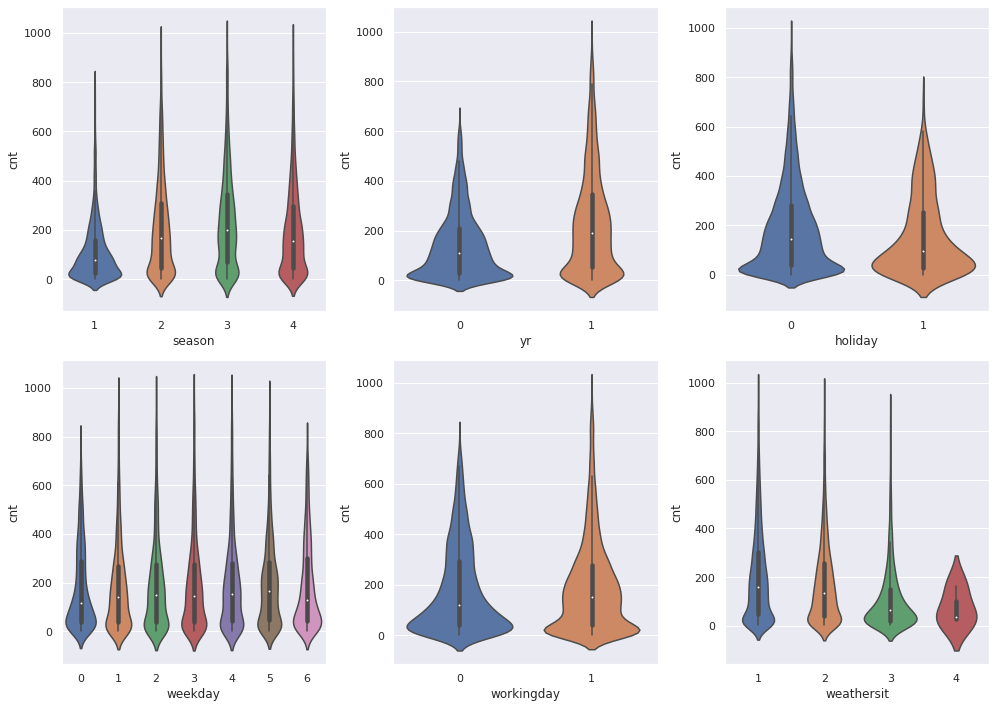

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = (14, 10))
j = 1
for i in range(0, len(some_cat_vars)):
  plt.subplot(2, 3, j)
  sns.violinplot(data = bike_df, x = some_cat_vars[i], y = "cnt")
  j += 1

plt.tight_layout()
plt.savefig(f"{images_dir}/violinplot_categoric_vars.pdf")
plt.show()

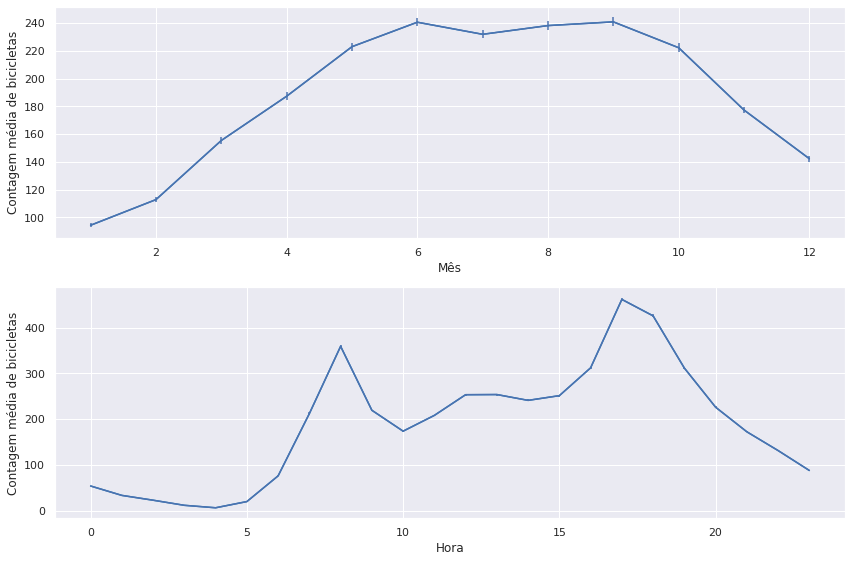

In [ ]:
months_hour = bike_df.columns[[4,5]]
sns.set_style("darkgrid")
plt.figure(figsize = (12, 8))

plt.subplot(2, 1, 1)
# contagem media por mês
cnt_means_mnth = bike_df.groupby('mnth')['cnt'].mean().array.to_numpy()
# erro padrao associado a media
cnt_stds_mnth = 2*bike_df.groupby('mnth')['cnt'].std().array.to_numpy()/(np.sqrt(bike_df.shape[0]))
plt.plot(bike_df['mnth'].unique(), cnt_means_mnth, color = "tab:blue")
plt.errorbar(bike_df['mnth'].unique(),
            cnt_means_mnth,
            yerr = cnt_stds_mnth,
            fmt='-')

plt.xlabel("Mês")
plt.ylabel("Contagem média de bicicletas")

plt.subplot(2, 1, 2)
# contagem media por hora
cnt_means_hr = bike_df.groupby('hr')['cnt'].mean().array
# erro padrao associado a media
cnt_stds_hr = 2*bike_df.groupby('hr')['cnt'].std().array.to_numpy()/(np.sqrt(bike_df.shape[0]))

plt.plot(bike_df['hr'].unique(), cnt_means_hr.to_numpy(),color = "tab:blue")
plt.errorbar(bike_df['hr'].unique(),
            cnt_means_hr,
            yerr = cnt_stds_hr,
            fmt='-')

plt.xlabel("Hora")
plt.ylabel("Contagem média de bicicletas")

plt.tight_layout()
plt.savefig(f"{images_dir}/mes_hora_versus_bike.pdf")
plt.show()

# Modelagem e predições:

Retirando primeiramente algumas variáveis:

In [ ]:
# retirando atemp, instant, dteday, casual e registered
bike_clean = bike_df.drop(['instant', 'dteday', 'atemp', 'casual', 'registered'], axis = 1)
bike_clean.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


Decodificando as variáveis qualitativas por one hot encoding:

In [ ]:
# selecionando o nome das colunas continuas e categoricas
cols_ind = (bike_clean.select_dtypes(include='int64').drop(['cnt'], axis = 1)
.columns)

cols_num = (bike_clean.select_dtypes(include = "float64")).columns

# para normalizar e decodificar
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# escalonamento das variaveis reservado para apos divisao em treino e teste
numeric_transformer = StandardScaler()

# one hot encoding tirando um dos fatores para nao ter
categorical_transformer = OneHotEncoder(drop = "first", sparse = False)

encoded_columns = categorical_transformer.fit_transform(bike_clean[cols_ind])

# X e y separados:
X = np.concatenate([encoded_columns, bike_clean[cols_num].values], axis = 1)
y = bike_clean['cnt'].values
X

array([[0.    , 0.    , 0.    , ..., 0.24  , 0.81  , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.22  , 0.8   , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.22  , 0.8   , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.26  , 0.6   , 0.1642],
       [0.    , 0.    , 0.    , ..., 0.26  , 0.56  , 0.1343],
       [0.    , 0.    , 0.    , ..., 0.26  , 0.65  , 0.1343]])

In [ ]:
# divisao dos dados em treinamento e teste
# 0.2 para teste e 0.8 para o treino, tendo mais que o suficiente 
# de teste para uma boa estimação do risco
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# tamanhos do conjunto de treinamento e teste
print(X_train.shape)
print(X_test.shape)
p = X_train.shape[1]

(13903, 52)
(3476, 52)


AJustando diferentes modelos e tunando se necessário (usaremos como score o R2 ajustado e o erro médio absoluto):


#   Regressão linear multipla:
Não há necessidade de escalonamento das variáveis



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
# regressao linear
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

lin_reg_preds = lin_reg.predict(X_test)

# score r2 e erro absoluto medio
mae_lin_reg = mean_absolute_error(y_test, lin_reg_preds)

def adjusted_r2(y_true, y_pred, X_test):
  n = X_test.shape[0]
  p = X_test.shape[1]
  r2 = r2_score(y_true, y_pred)
  adj = 1- ((1 - r2)*(n - 1)/(n - p -1))
  return(adj)
  
r2_lin_reg = r2_score(y_test, lin_reg_preds)

print("Erro médio absoluto: {}".format(mae_lin_reg))
print("Score R2: {}".format(r2_lin_reg))
print("Score R2 ajustado: {}".format(adjusted_r2(y_test, lin_reg_preds, X_test)))

Erro médio absoluto: 74.0969054181688
Score R2: 0.681019658024719
Score R2 ajustado: 0.6761739151726258


Vemos pelo erro médio absoluto um ajuste não muito bom juntamente com um R2 ajustado também não tão adequado, tendo o gráfico de valores observados contra preditos:

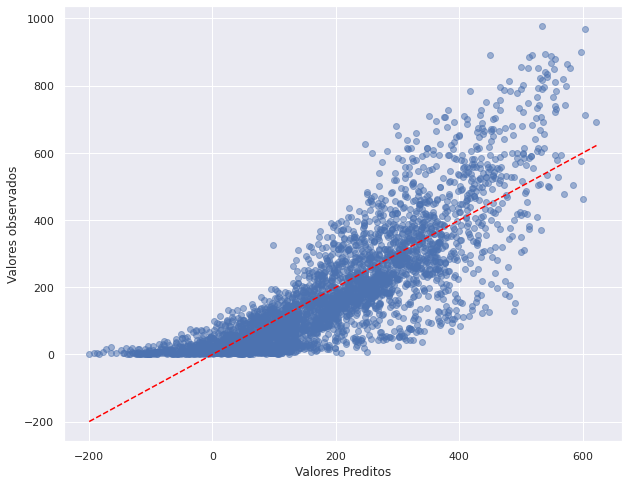

In [ ]:
# linha identidade
x_vals = np.linspace(min(lin_reg_preds), max(lin_reg_preds))
y_vals = x_vals

sns.set_style("darkgrid")
plt.figure(figsize = (10, 8))
plt.scatter(lin_reg_preds, y_test, alpha = 0.5)
plt.plot(x_vals, y_vals, '--', c = "red")
plt.xlabel("Valores Preditos")
plt.ylabel("Valores observados")
plt.savefig(f"{images_dir}/preds_vs_obs_reg_lin.pdf")
plt.show()

Vemos que algumas predições são negativas quando o domínio do problema é estritamente positivo, tendo vários zeros. Se checarmos os coeficientes, teremos:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


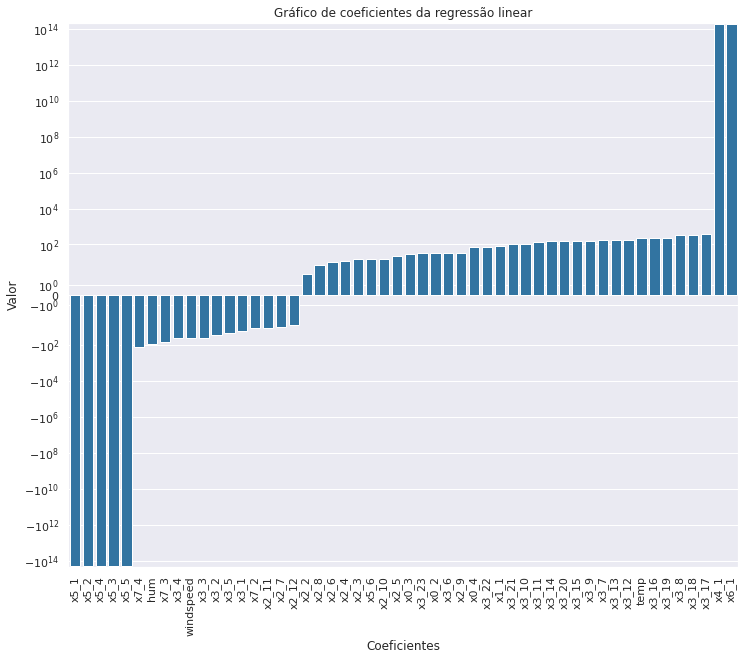

In [ ]:
coefs_names = np.concatenate((categorical_transformer.get_feature_names(), cols_num), axis = None)
order = lin_reg.coef_.argsort()

plt.figure(figsize = (12, 10))
sns.barplot(x = coefs_names[order], y = lin_reg.coef_[order], color = "tab:blue")
plt.xticks(rotation = 90)
plt.xlabel("Coeficientes")
plt.ylabel("Valor")
plt.yscale('symlog')
plt.title("Gráfico de coeficientes da regressão linear")
plt.savefig(f"{images_dir}/reg_lin_coefs.pdf")
plt.show()

Vemos coeficientes muito negativos e muito positivos, com altos valores em certas covariáveis.

#   Regressão linear multipla positiva

Assim, como solução desse problema, podemos adicionar uma restrição no modelo de regressão linear, de forma que os coeficientes da regressão $\hat{\beta}_j$ sejem todos positivos e logo $\hat{y}$ também o seja:

In [ ]:
import sklearn
# atualizando sklearn se necessario
# porque geralmente a versao do colab eh 0.22
if sklearn.__version__ == "0.22.2.post1":
  !pip uninstall scikit-learn -y
  !pip install -U scikit-learn

# regressao linear

lin_reg_pos = LinearRegression(positive = True, fit_intercept = False)
lin_reg_pos.fit(X_train, y_train)

lin_reg_pos_preds = lin_reg_pos.predict(X_test)

# score r2 e erro absoluto medio
mae_lin_reg_pos = mean_absolute_error(y_test, lin_reg_pos_preds)

def adjusted_r2(y_true, y_pred, X_test):
  n = X_test.shape[0]
  p = X_test.shape[1]
  r2 = r2_score(y_true, y_pred)
  adj = 1- ((1 - r2)*(n - 1)/(n - p -1))
  return(adj)

r2_lin_reg_pos = r2_score(y_test, lin_reg_pos_preds)

print("Erro médio absoluto: {}".format(mae_lin_reg_pos))
print("Score R2: {}".format(r2_lin_reg_pos))
print("Score R2 ajustado: {}".format(adjusted_r2(y_test, lin_reg_pos_preds, X_test)))

Erro médio absoluto: 83.59432679668134
Score R2: 0.5914630790015799
Score R2 ajustado: 0.5852568505785831


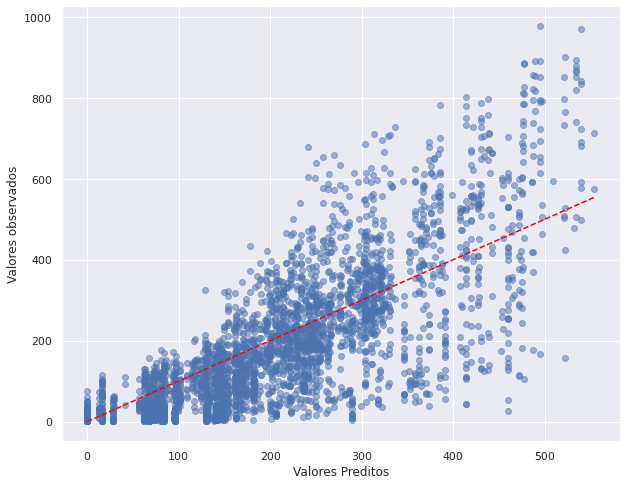

In [ ]:
# linha identidade
x_vals = np.linspace(min(lin_reg_pos_preds), max(lin_reg_pos_preds))
y_vals = x_vals

sns.set_style("darkgrid")
plt.figure(figsize = (10, 8))
plt.scatter(lin_reg_pos_preds, y_test, alpha = 0.5)
plt.plot(x_vals, y_vals, '--', c = "red")
plt.xlabel("Valores Preditos")
plt.ylabel("Valores observados")
plt.savefig(f"{images_dir}/preds_vs_obs_reg_lin_pos.pdf")
plt.show()

# nomes das variáveis

Obtemos um ajuste pior que o anterior. Assim, talvez o modelos de regressão linear não seja tão bom. Podemos recorrer a métodos não paramétricos.


#   KNN: Primeiramente, tunaremos o número de vizinhos $k$:



In [ ]:
# grid para k
n_neighbors = list(range(1, 85))
hyperpar = dict(n_neighbors = n_neighbors)

# escalonando
X_train_scaled = numeric_transformer.fit_transform(X_train)

from sklearn.neighbors import KNeighborsRegressor
# objeto do knn
knn_tun = KNeighborsRegressor()
# grid search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(knn_tun, hyperpar, cv = 10, scoring = "neg_mean_absolute_error")

# fitando e achando o melhor modelo
best_model = clf.fit(X_train_scaled, y_train)

# melhor k
print('Melhor k:', best_model.best_estimator_.get_params()['n_neighbors'])

Melhor k: 2


In [ ]:
historic = pd.DataFrame(best_model.cv_results_)
historic.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002674,0.000228,0.253534,0.080695,1,{'n_neighbors': 1},-52.472322,-55.804457,-57.714594,-54.028777,-55.425180,-57.738849,-55.987050,-56.476978,-56.278417,-55.037410,-55.696403,1.515664,7
1,0.002497,0.000036,0.260463,0.003414,2,{'n_neighbors': 2},-51.105679,-54.238677,-53.487779,-51.657554,-52.612950,-55.540647,-55.239568,-55.078777,-54.247482,-52.144604,-53.535372,1.500874,1
2,0.002571,0.000194,0.296259,0.005230,3,{'n_neighbors': 3},-52.686556,-54.951354,-55.824587,-55.167626,-53.472182,-56.697842,-56.526139,-55.474580,-56.727818,-54.956115,-55.248480,1.272930,3
3,0.002510,0.000063,0.373106,0.007469,4,{'n_neighbors': 4},-53.554817,-54.805536,-56.425773,-55.680935,-53.894784,-57.380396,-57.830576,-56.635432,-58.502158,-55.887230,-56.059764,1.549798,10
4,0.002575,0.000247,0.373875,0.008808,5,{'n_neighbors': 5},-54.124371,-55.407477,-57.316463,-54.943741,-55.526043,-57.485612,-59.187770,-58.130791,-58.960719,-55.796115,-56.687910,1.671134,14


Média e std do score plotados:

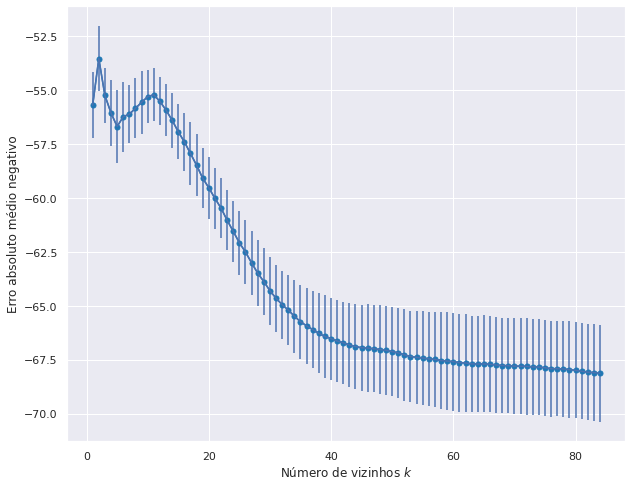

In [ ]:
plt.figure(figsize = (10, 8))

plt.plot(historic['param_n_neighbors'], historic['mean_test_score'],color = "tab:blue",
         marker = '.', markersize = 10)
plt.errorbar(historic['param_n_neighbors'],
            historic['mean_test_score'],
            yerr = historic['std_test_score'],
            fmt = '-')
plt.xlabel(r"Número de vizinhos $k$")
plt.ylabel(r"Erro absoluto médio negativo")
plt.savefig(f"{images_dir}/knn_tunagem_k.pdf")
plt.show()

2 é o melhor número de vizinhos, tendo:

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 2)
knn.fit(X_train_scaled, y_train)

X_test_scaled = numeric_transformer.transform(X_test)
knn_preds = knn.predict(X_test_scaled)

# score r2 e erro absoluto medio
mae_knn_reg = mean_absolute_error(y_test, knn_preds)
r2_knn_reg = r2_score(y_test, knn_preds)

print("Erro médio absoluto: {}".format(mae_knn_reg))
print("Score R2: {}".format(r2_knn_reg))
print("Score R2 ajustado: {}".format(adjusted_r2(y_test, knn_preds, X_test_scaled)))

Erro médio absoluto: 52.20368239355581
Score R2: 0.7773102351797432
Score R2 ajustado: 0.7739272764386818


Obtemos um ótimo ajuste no KNN em comparação ao modelo linear, tendo o seguinte gráfico de 

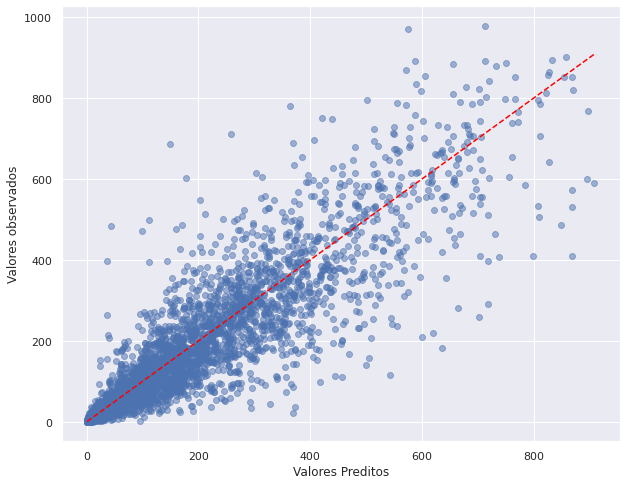

In [ ]:
# linha identidade
x_vals = np.linspace(min(knn_preds), max(knn_preds))
y_vals = x_vals

sns.set_style("darkgrid")
plt.figure(figsize = (10, 8))
plt.scatter(knn_preds, y_test, alpha = 0.5)
plt.plot(x_vals, y_vals, '--', c = "red")
plt.xlabel("Valores Preditos")
plt.ylabel("Valores observados")
plt.savefig(f"{images_dir}/preds_vs_obs_knn_k.pdf")
plt.show()

Obtemos um ajuste relativamente bom do KNN, porém pode-se testar ainda, fixar $k = 2$ e variar o hiper-parâmetro $p$ nas distâncias:

In [ ]:
# fixando k e variando p
p = list(range(1, 10))
hyperpar = dict(p = p)

# escalonando
X_train_scaled = numeric_transformer.fit_transform(X_train)

# objeto do knn
knn_tun = KNeighborsRegressor()
# grid search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(knn_tun, hyperpar, cv = 10, scoring = "neg_mean_absolute_error")

# fitando e achando o melhor modelo
best_model = clf.fit(X_train_scaled, y_train)

# melhor k
print('Melhor p com k = 2:', best_model.best_estimator_.get_params()['p'])

Melhor p com k = 2: 1


Mesmos gráficos do $k$ para o $p$

In [ ]:
historic_p = pd.DataFrame(best_model.cv_results_)
historic_p.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002365,0.000058,0.822663,0.008658,1,{'p': 1},-50.560316,-51.708267,-52.018116,-52.030072,-50.343309,-53.391367,-53.720432,-53.205899,-55.347050,-51.468201,-52.379303,1.459468,1
1,0.002436,0.000138,0.374486,0.007461,2,{'p': 2},-54.124371,-55.407477,-57.316463,-54.943741,-55.526043,-57.485612,-59.187770,-58.130791,-58.960719,-55.796115,-56.687910,1.671134,2
2,0.002417,0.000067,27.229013,0.018671,3,{'p': 3},-58.302948,-59.446873,-62.069878,-58.820719,-58.239856,-62.340719,-63.024748,-62.052518,-62.085755,-59.266619,-60.565063,1.802645,3
3,0.002558,0.000329,26.966525,0.030339,4,{'p': 4},-59.309561,-60.809921,-63.399712,-60.218273,-59.428777,-63.448489,-64.485180,-63.094532,-62.805468,-60.445612,-61.744553,1.796783,4
4,0.002447,0.000085,27.184188,0.021576,5,{'p': 5},-60.775413,-61.034795,-64.419986,-60.541007,-60.725612,-64.390072,-65.249496,-63.878705,-63.403885,-61.696403,-62.611537,1.736801,5


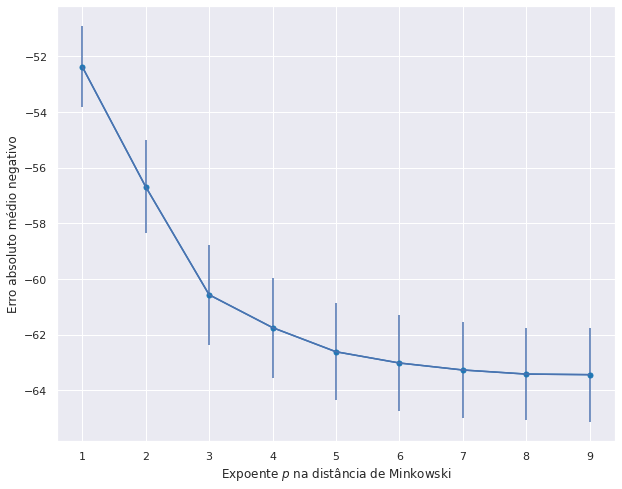

In [ ]:
plt.figure(figsize = (10, 8))

plt.plot(historic_p['param_p'], historic_p['mean_test_score'],color = "tab:blue",
         marker = '.', markersize = 10)
plt.errorbar(historic_p['param_p'],
            historic_p['mean_test_score'],
            yerr = historic_p['std_test_score'],
            fmt = '-')
plt.xlabel(r"Expoente $p$ na distância de Minkowski")
plt.ylabel(r"Erro absoluto médio negativo")
plt.savefig(f"{images_dir}/knn_tunagem_p.pdf")
plt.show()

Vemos que talvez a distância manhattan seja melhor que a euclidiana, e assim, podemos fixar $p = 1$ ao invés de $p = 2$

In [ ]:
knn_p = KNeighborsRegressor(n_neighbors = 2, p = 1)
knn_p.fit(X_train_scaled, y_train)

X_test_scaled = numeric_transformer.transform(X_test)
knn_p_preds = knn_p.predict(X_test_scaled)


# score r2 ajustado e não ajustado e erro absoluto medio
mae_knn_p_reg = mean_absolute_error(y_test, knn_p_preds)
r2_knn_p_reg = r2_score(y_test, knn_p_preds)
print("Erro médio absoluto: {}".format(mae_knn_p_reg))
print("Score R2: {}".format(r2_knn_p_reg))
print("Score R2 ajustado: {}".format(adjusted_r2(y_test, knn_p_preds, X_test_scaled)))

Erro médio absoluto: 48.795310701956275
Score R2: 0.8008237263532575
Score R2 ajustado: 0.7977979693478148


Conseguimos diminuir ainda mais o risco estimado, tendo inclusive uma melhora no $R^2$ ajustado. Ao plotarmos os valores preditos versus observados temos:

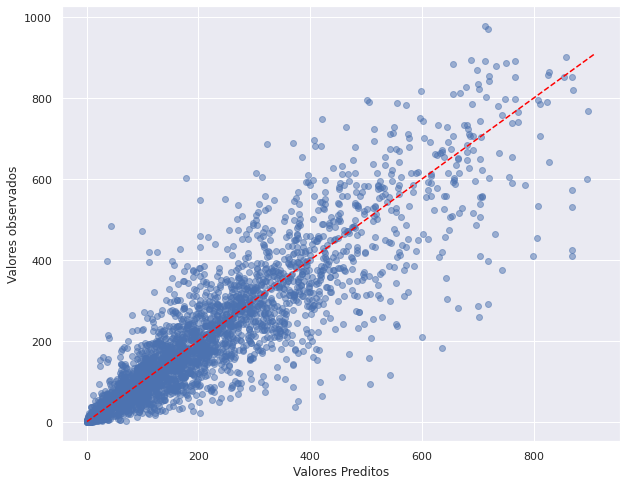

In [ ]:
# linha identidade
x_vals = np.linspace(min(knn_preds), max(knn_preds))
y_vals = x_vals

sns.set_style("darkgrid")
plt.figure(figsize = (10, 8))
plt.scatter(knn_p_preds, y_test, alpha = 0.5)
plt.plot(x_vals, y_vals, '--', c = "red")
plt.xlabel("Valores Preditos")
plt.ylabel("Valores observados")
plt.savefig(f"{images_dir}/preds_vs_obs_knn_k_p.pdf")
plt.show()

Ajustar: Arvore de decisão (talvez, mas é ruim para regressao), Random forest, SVM, Boosting e Rede neural (não focar tanto).




*   Árvore de regressão







#   Random Forest

In [ ]:
# grid para a profundidade das arvores
max_features = ["auto", "sqrt", "log2"]
hyperpar_rfr = dict(max_features = max_features)

from sklearn.ensemble import RandomForestRegressor
rfr_cv = RandomForestRegressor(n_estimators = 500)

# grid search

clf_rfr = GridSearchCV(rfr_cv, hyperpar_rfr, cv = 10, scoring = "neg_mean_absolute_error")

# fitando e achando o melhor modelo
best_model = clf_rfr.fit(X_train, y_train)

# melhor profundidade
print('Melhor número de features para as árvores:', best_model.best_estimator_.get_params()['max_features'])

Melhor número de features para as árvores: auto


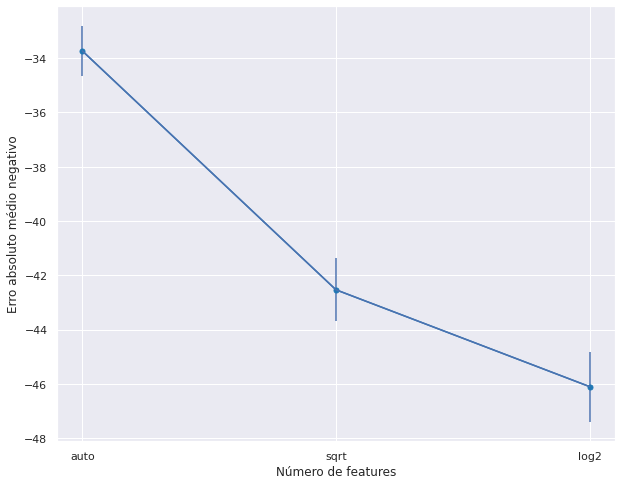

In [ ]:
historic = pd.DataFrame(best_model.cv_results_)

plt.figure(figsize = (10, 8))
plt.plot(historic['param_max_features'], historic['mean_test_score'],color = "tab:blue",
         marker = '.', markersize = 10)
plt.errorbar(historic['param_max_features'],
            historic['mean_test_score'],
            yerr = historic['std_test_score'],
            fmt = '-')
plt.xlabel(r"Número de features")
plt.ylabel(r"Erro absoluto médio negativo")
plt.savefig(f"{images_dir}/tunagem_rf.pdf")
plt.show()

In [ ]:
rfr = RandomForestRegressor(n_estimators = 500, max_features = "auto")
rfr.fit(X_train, y_train)

rfr_preds = rfr.predict(X_test)

# score r2 e erro absoluto medio
mae_rfr = mean_absolute_error(y_test, rfr_preds)
r2_rfr = r2_score(y_test, rfr_preds)

print("Erro médio absoluto: {}".format(mae_rfr))
print("Score R2: {}".format(r2_rfr))
print("Score R2 ajustado: {}".format(adjusted_r2(y_test, rfr_preds, X_test)))

Erro médio absoluto: 31.96492717272179
Score R2: 0.9168658815064404
Score R2 ajustado: 0.9156029617980954


Importância das variáveis:

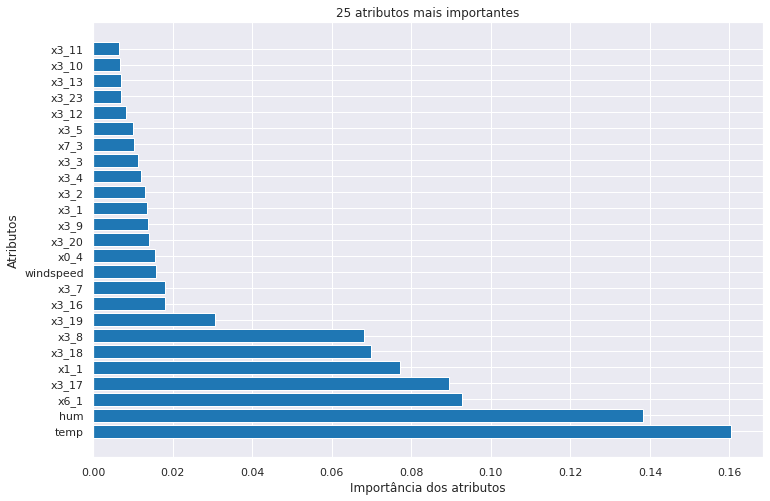

In [ ]:
importances = rfr.feature_importances_
# ordenando os indices
sorted_idx = importances.argsort()
# ordenando agora de maneira decrescente e selecionando apenas os 25 primeiros
n = 25
sorted_idx = sorted_idx[::-1][:n]
# selecionando apenas os 25 primeiros features
# pegando o nome dos features para plotar grafico de importancia ordenado:
plt.figure(figsize = (12, 8))
plt.barh(coefs_names[sorted_idx], importances[sorted_idx], color = "tab:blue")
plt.xlabel("Importância dos atributos")
plt.ylabel("Atributos")
plt.title("25 atributos mais importantes")
plt.savefig(f"{images_dir}/importancias_rf.pdf")
plt.show()

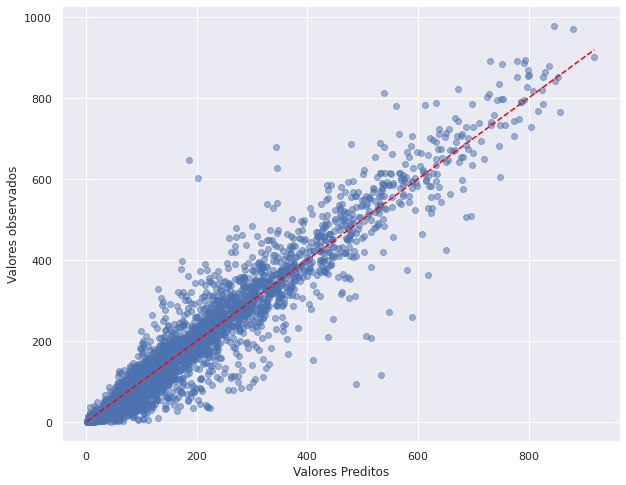

In [ ]:
# linha identidade
x_vals = np.linspace(min(rfr_preds), max(rfr_preds))
y_vals = x_vals

sns.set_style("darkgrid")
plt.figure(figsize = (10, 8))
plt.scatter(rfr_preds, y_test, alpha = 0.5)
plt.plot(x_vals, y_vals, '--', c = "red")
plt.xlabel("Valores Preditos")
plt.ylabel("Valores observados")
plt.savefig(f"{images_dir}/preds_vs_obs_rf.pdf")
plt.show()

# XGBoosting


Como estratégia de ajuste do XGBoosting, inicialmente será estudado o número de iterações com os outros hiperparâmetros fixos (com seus valores padrões). Desse modo, será possível encontrar um número razoável de árvores geradas para que o modelo seja executado. 

Desse modo, será feito uma validação cruzada, com ...

In [ ]:
import xgboost as xgb
#from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
# instalando bayes_opt
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization
from sklearn.metrics import r2_score, mean_absolute_error

def adjusted_r2(y_true, y_pred, X_test):
  n = X_test.shape[0]
  p = X_test.shape[1]
  r2 = r2_score(y_true, y_pred)
  adj = 1- ((1 - r2)*(n - 1)/(n - p -1))
  return(adj)

In [ ]:
#=============================================
##### Criando as matrizes para o XGB
xgb_mat_treino = xgb.DMatrix(data = X_train, label=y_train)
xgb_mat_teste = xgb.DMatrix(data=X_test, label=y_test)

#=============================================
##### CV do xgb para escolher a iteracao
xgb_padrao = xgb.XGBRegressor(objective='reg:squarederror')
xgb_param_padrao = xgb_padrao.get_xgb_params()

### 5min na nuvem --> 5 fold
### 1min30s local --> 10 fold
cv_xgb = xgb.cv(dtrain = xgb_mat_treino,
                num_boost_round = 5000,
                nfold = 10,
                params = xgb_param_padrao,
                early_stopping_rounds = 100,
                metrics = "rmse",
                seed=5)

In [ ]:
print("O número de iterações ideal foi de {} com a média dos erros quadráticos nas validações de {}.".
      format((cv_xgb["test-rmse-mean"]).index[-1], 
             round( (cv_xgb["test-rmse-mean"]).values[-1],4 ) ))

O número de iterações ideal foi de 4999 com a média dos erros quadráticos nas validações de 46.6691.


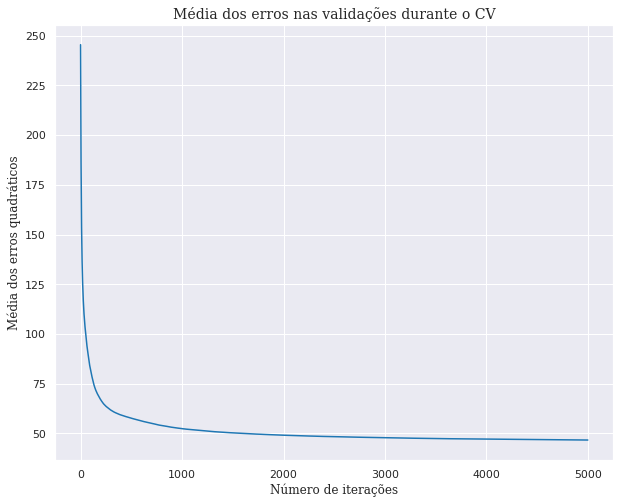

In [ ]:
plt.figure(figsize = (10, 8))

plt.plot(range(0, cv_xgb['test-rmse-mean'].size), 
         cv_xgb['test-rmse-mean'],
         color = "tab:blue", markersize = 2)

# plt.errorbar(historic['param_n_neighbors'],
#             historic['mean_test_score'],
#             yerr = historic['std_test_score'],
#             fmt = '-')

plt.title("Média dos erros nas validações durante o CV", fontdict={'family': 'serif',  'size': 14})
plt.xlabel(r"Número de iterações", fontdict={'family': 'serif',  'size': 12})
plt.ylabel(r"Média dos erros quadráticos",fontdict={'family': 'serif',  'size': 12})
plt.savefig(f"{images_dir}/erros_valid_xgb.pdf")
plt.show()

In [ ]:
#=============================================
##### Grid Search - Com otimização bayesiana

type((cv_xgb["test-rmse-mean"]).index[-1])

### numero de iteracoes encontrado no CV anterior -->
## (cv_xgb["test-rmse-mean"]).index[-1]

### Funcao que entra esses parametros e retorna
## a media do erro quadratico medio depois uma 
## validacao cruzada
def fun_xgb_para_tunar(max_depth,learning_rate,subsample):

  ### Validacao cruzada com o numero de iteracoes
  ## encontrado anteriormente
  cv_xgb_resultado = xgb.cv(dtrain = xgb_mat_treino,
                                  params = {'max_depth':int(max_depth),
                                            'learning_rate':learning_rate,
                                            'subsample':subsample},
                                  num_boost_round = (cv_xgb["test-rmse-mean"]).index[-1],
                                  nfold = 10,
                                  metrics = "rmse")
  
  ### Returna o valor em forma de negativa, pois o objetivo
  ## serah maximizar a funcao
  return (-1.0 * cv_xgb_resultado['test-rmse-mean'].iloc[-1])

### Limites inferiores e superioes dos 
## hiperparametros que serao explorados.
limites_bo = {'max_depth':(3,10),
              'learning_rate':(0,1),
              'subsample': (10**(-6),1) }

### Escrita do Otimizador
xgb_bo = BayesianOptimization(f = fun_xgb_para_tunar, 
                              pbounds = limites_bo,
                              random_state=5)

### 7min~ No local
xgb_bo_max = xgb_bo.maximize(n_iter=5,init_points=8,acq='ei')


|   iter    |  target   | learni... | max_depth | subsample |
-------------------------------------------------------------
|  1        | -57.44    |  0.222    |  9.095    |  0.2067   |
|  2        | -74.49    |  0.9186   |  6.419    |  0.6117   |
|  3        | -260.1    |  0.7659   |  6.629    |  0.2968   |
|  4        | -45.65    |  0.1877   |  3.565    |  0.7384   |
|  5        | -49.56    |  0.4413   |  4.108    |  0.8799   |
|  6        | -54.0     |  0.2741   |  5.9      |  0.2961   |
|  7        | -61.42    |  0.6288   |  7.059    |  0.5999   |
|  8        | -53.9     |  0.2658   |  4.993    |  0.2536   |
|  9        | -62.74    |  0.9951   |  5.86     |  0.8601   |
|  10       | -68.32    |  0.9549   |  4.488    |  0.6391   |
|  11       | -47.82    |  0.1787   |  5.192    |  0.4629   |
|  12       | -46.12    |  0.08348  |  5.531    |  0.3084   |
|  13       | -49.43    |  0.1708   |  5.319    |  0.2824   |


Utilizando o Otimizador Bayesiano, obteve que

In [ ]:
#print(xgb_bo.max)
print("A taxa de aprendizado após a tunagem foi de {}.".format(xgb_bo.max['params']['learning_rate']) )
print("A profundidade máxima das árvores após a tunagem foi de {}.".format( int(xgb_bo.max['params']['max_depth']) ) )
print("O razão de reamostragem do treinamento foi de {}.".format(xgb_bo.max['params']['subsample']) )

A taxa de aprendizado após a tunagem foi de 0.18772122866125163.
A profundidade máxima das árvores após a tunagem foi de 3.
O razão de reamostragem do treinamento foi de 0.7384405577586738.


In [ ]:
#=============================================
##### Fazendo o XBG de fato

modelo_xgb = xgb.train(params= {'max_depth' :  int(xgb_bo.max['params']['max_depth']),
                                'learning_rate' : xgb_bo.max['params']['learning_rate'],
                                'subsample' : xgb_bo.max['params']['subsample'],
                                'objective' : 'reg:squarederror',
                                },
                       num_boost_round = (cv_xgb["test-rmse-mean"]).index[-1],
                       dtrain = xgb_mat_treino)


Adicionando o nome dos atributos:

In [ ]:
modelo_xgb.feature_names = list(coefs_names)

<Figure size 720x576 with 0 Axes>

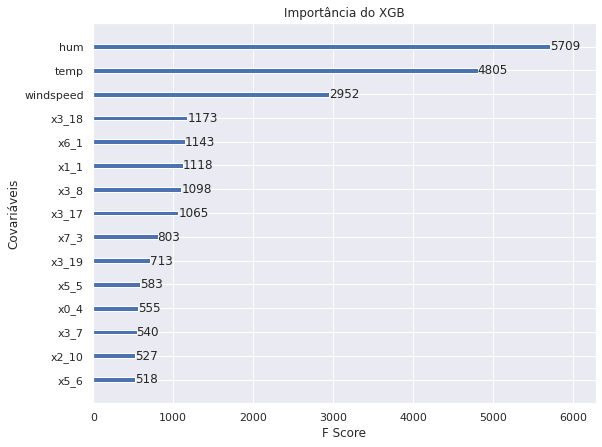

In [ ]:
plt.figure(figsize = (10, 8))
xgb.plot_importance(modelo_xgb,xlabel="F Score",ylabel="Covariáveis",
                    title="Importância do XGB",
                    max_num_features= 15)
plt.savefig(f"{images_dir}/importancias_xgb.pdf")
plt.show()

Em relação a importância da covariável, essa medida foi calculada utilizando o número de vezes que a covariável aparece na árvore. Desse modo, observa-se que f49 foi a mais influente.

In [ ]:
predito_xgb = modelo_xgb.predict(xgb_mat_teste)

predito_xgb

mae_xgb = mean_absolute_error(y_test, predito_xgb)
r2_xgb = r2_score(y_test,predito_xgb)

print("Erro médio absoluto: {}".format(mae_xgb))
print("Score R2: {}".format(r2_xgb ))
print("Score R2 ajustado: {}".format(adjusted_r2(y_test, predito_xgb, X_test)))

Erro médio absoluto: 28.093542899186236
Score R2: 0.9410904265427221
Score R2 ajustado: 0.9401955104399531


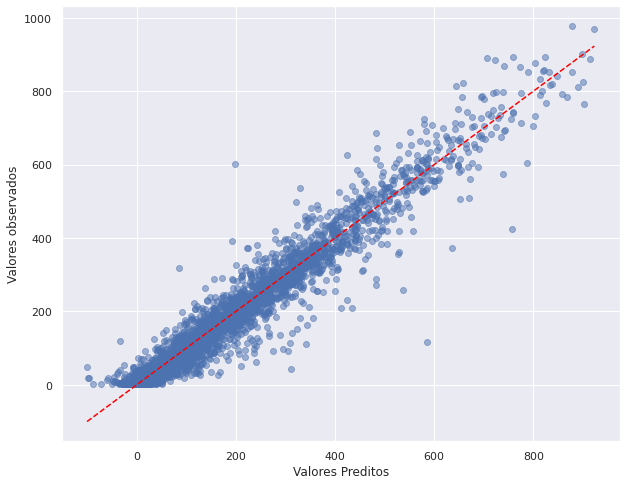

In [ ]:
# linha identidade
x_vals = np.linspace(min(predito_xgb), max(predito_xgb))
y_vals = x_vals

sns.set_style("darkgrid")
plt.figure(figsize = (10, 8))
plt.scatter(predito_xgb, y_test, alpha = 0.5)
plt.plot(x_vals, y_vals, '--', c = "red")
plt.xlabel("Valores Preditos")
plt.ylabel("Valores observados")
plt.savefig(f"{images_dir}/preds_vs_obs_xgb.pdf")
plt.show()

# SVM


In [ ]:
from sklearn.svm import SVR
# instalando o scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

from sklearn.metrics import r2_score, mean_absolute_error

def adjusted_r2(y_true, y_pred, X_test):
  n = X_test.shape[0]
  p = X_test.shape[1]
  r2 = r2_score(y_true, y_pred)
  adj = 1- ((1 - r2)*(n - 1)/(n - p -1))
  return(adj)


# escalonando
X_train_scaled = numeric_transformer.fit_transform(X_train)
X_test_scaled = numeric_transformer.transform(X_test)

     |████████████████████████████████| 100 kB 5.7 MB/s 


## SVR rbf (Radial basis function)

Inicialmente, será considerando o kernel rbf com todos os outros hiperparametros sendo valores padrões.

In [ ]:
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X=X_train_scaled,y=y_train)


predito_svr_rbf = svr_rbf.predict( X_test_scaled  )

mae_srv_rbf = mean_absolute_error(y_test, predito_svr_rbf)
r2_srv_rbf = r2_score(y_test,predito_svr_rbf)

print("Erro médio absoluto: {}".format(mae_srv_rbf))
print("Score R2: {}".format(r2_srv_rbf))
print("Score R2 ajustado: {}".format(adjusted_r2(y_test, predito_svr_rbf,  X_test_scaled ) )) 

Erro médio absoluto: 85.21610038937277
Score R2: 0.42976363932677986
Score R2 ajustado: 0.4211009776980894


Nota-se que com o kernel rbf, as medidas de avaliação não estão muito boas, indicando o perder preditivo ruim deste kernel.

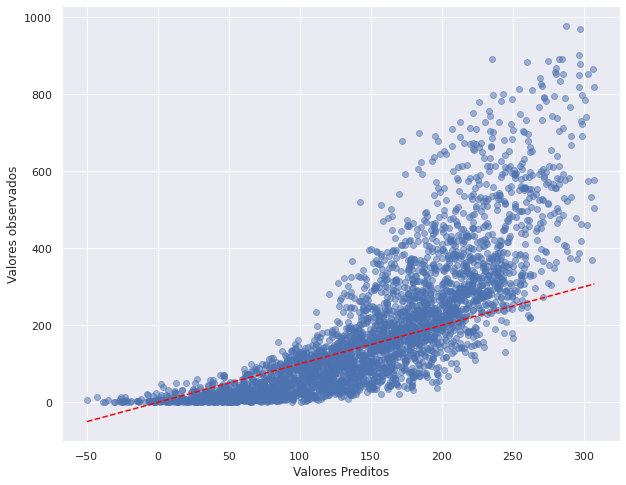

In [ ]:
# linha identidade
x_vals = np.linspace(min(predito_svr_rbf), max(predito_svr_rbf))
y_vals = x_vals

sns.set_style("darkgrid")
plt.figure(figsize = (10, 8))
plt.scatter(predito_svr_rbf, y_test, alpha = 0.5)
plt.plot(x_vals, y_vals, '--', c = "red")
plt.xlabel("Valores Preditos")
plt.ylabel("Valores observados")
plt.savefig(f"{images_dir}/preds_vs_obs_reg_SVR_RBF.pdf")
plt.show()

O gráfico de valores observados e preditos reforça que o kernal rbf não é uma boa escolha para este problema.

## SRV sigmoid

Em seguida, será considerando o kernel sigmoid com todos os outros hiperparametros sendo valores padrões.

In [ ]:
svr_sigmoid = SVR(kernel='sigmoid')
svr_sigmoid.fit(X=X_train_scaled,y=y_train)


predito_svr_sigmoid= svr_sigmoid.predict( X_test_scaled  )

mae_srv_sigmoid = mean_absolute_error(y_test, predito_svr_sigmoid)
r2_srv_sigmoid = r2_score(y_test,predito_svr_rbf)

print("Erro médio absoluto: {}".format(mae_srv_sigmoid))
print("Score R2: {}".format(r2_srv_sigmoid))
print("Score R2 ajustado: {}".format(adjusted_r2(y_test, predito_svr_sigmoid,  X_test_scaled ) )) 

Erro médio absoluto: 81.35531653970908
Score R2: 0.42976363932677986
Score R2 ajustado: 0.5144730003542307


Em relação ao kernel rbf, o kernal sigmoid foi levemente melhor, ainda sim, ambos os kernels não foram bem.

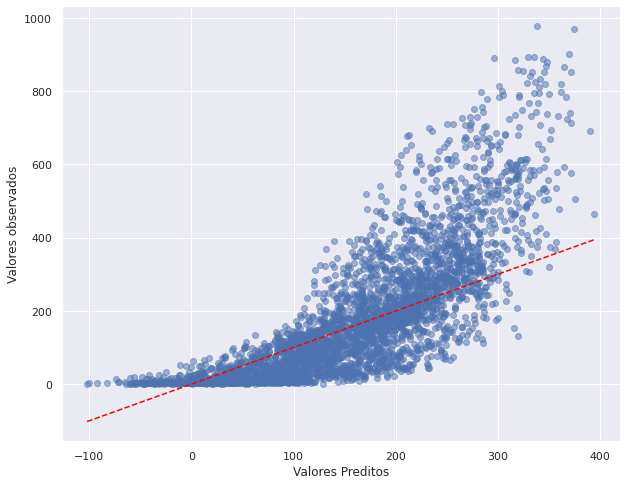

In [ ]:
# linha identidade
x_vals = np.linspace(min(predito_svr_sigmoid), max(predito_svr_sigmoid))
y_vals = x_vals

sns.set_style("darkgrid")
plt.figure(figsize = (10, 8))
plt.scatter(predito_svr_sigmoid, y_test, alpha = 0.5)
plt.plot(x_vals, y_vals, '--', c = "red")
plt.xlabel("Valores Preditos")
plt.ylabel("Valores observados")
plt.savefig(f"{images_dir}/preds_vs_obs_SVR_sigmoid.pdf")
plt.show()

### SVR Linear

Dado que os dois kernels anteriores não se sairam bem, escolhe-se o kernel mais simples possível, que o linear. 

In [ ]:
svr_linear = SVR(kernel='linear')
svr_linear.fit(X=X_train_scaled,y=y_train)

predito_svr_linear = svr_linear.predict(X_test_scaled)

mae_srv_linear = mean_absolute_error(y_test, predito_svr_linear)
r2_srv_linear = r2_score(y_test,predito_svr_linear)

print("Erro médio absoluto: {}".format(mae_srv_linear))
print("Score R2: {}".format(r2_srv_linear))
print("Score R2 ajustado: {}".format(adjusted_r2(y_test, predito_svr_linear,X_test_scaled)))

Erro médio absoluto: 70.84786331895816
Score R2: 0.6531047251797274
Score R2 ajustado: 0.6478349167395714


Nota-se que o kernel linear mostrou resultados melhores que os kernels rbf e sigmoid anteriores, indicado que a simplicidade pode ser o caminho para os modelos SVR.

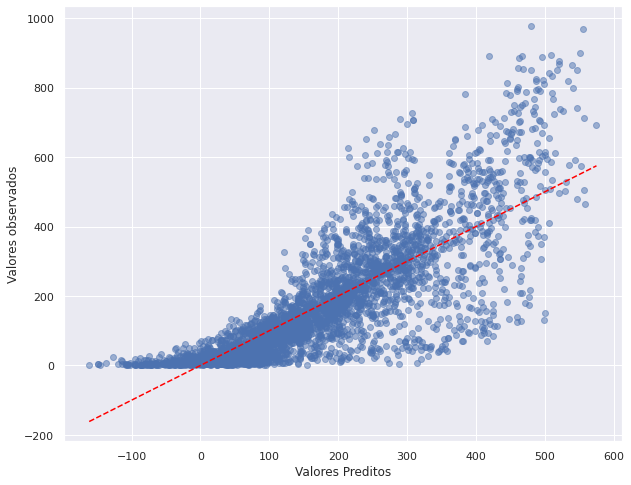

In [ ]:
# linha identidade
x_vals = np.linspace(min(predito_svr_linear), max(predito_svr_linear))
y_vals = x_vals

sns.set_style("darkgrid")
plt.figure(figsize = (10, 8))
plt.scatter(predito_svr_linear, y_test, alpha = 0.5)
plt.plot(x_vals, y_vals, '--', c = "red")
plt.xlabel("Valores Preditos")
plt.ylabel("Valores observados")
plt.savefig(f"{images_dir}/preds_vs_obs_SVR_linear.pdf")
plt.show()

### SVR Polinomial

Dado que o kernel linear obteve resultados melhores, tenta-se agora com o kernel Polinomial, buscando otimizar o grau do polinômio e o parâmetro C.

In [ ]:
svr_procura_poly = BayesSearchCV(estimator=SVR(kernel='poly'),
                              search_spaces={'degree': Integer(2,10),
                                             'C': Real(0.1,20)},
                              n_iter=5,n_points=1,n_jobs=1,
                              random_state=5,cv=3,verbose=1)

svr_procura_poly.fit(X=X_train_scaled, y=y_train)

print('Após a tunagem, o grau do polinômio é: {}'.format(svr_procura_poly.best_params_['degree']))
print('Após a tunagem, o C é: {}'.format(svr_procura_poly.best_params_['C']))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Após a tunagem, o grau do polinômio é: 3
Após a tunagem, o C é: 7.229066227956538


In [ ]:
svr_poly = SVR(kernel='poly', degree = svr_procura_poly.best_params_['degree'],
               C=svr_procura_poly.best_params_['C'])

svr_poly.fit(X_train_scaled,y_train)

predito_svr_poly = svr_poly.predict(X_test_scaled)

mae_srv_poly = mean_absolute_error(y_test, predito_svr_poly)
r2_srv_poly = r2_score(y_test,predito_svr_poly )

print("Erro médio absoluto: {}".format(mae_srv_poly))
print("Score R2: {}".format(r2_srv_poly))
print("Score R2 ajustado: {}".format(adjusted_r2(y_test, predito_svr_poly ,numeric_transformer.transform(X_test)) ))

Erro médio absoluto: 54.963583875924996
Score R2: 0.7402434694837268
Score R2 ajustado: 0.7362974164346919


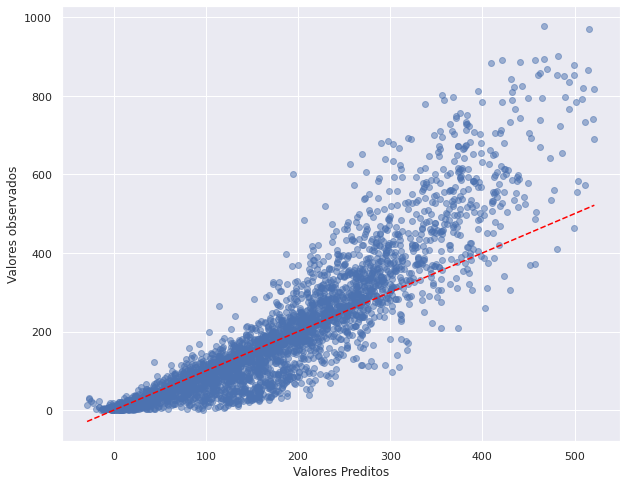

In [ ]:
# linha identidade
x_vals = np.linspace(min(predito_svr_poly), max(predito_svr_poly))
y_vals = x_vals

sns.set_style("darkgrid")
plt.figure(figsize = (10, 8))
plt.scatter(predito_svr_poly, y_test, alpha = 0.5)
plt.plot(x_vals, y_vals, '--', c = "red")
plt.xlabel("Valores Preditos")
plt.ylabel("Valores observados")
plt.savefig(f"{images_dir}/preds_vs_obs_SVR_poly.pdf")
plt.show()

Juntando varios gráficos e deixando algumas informações em formatos de tabela

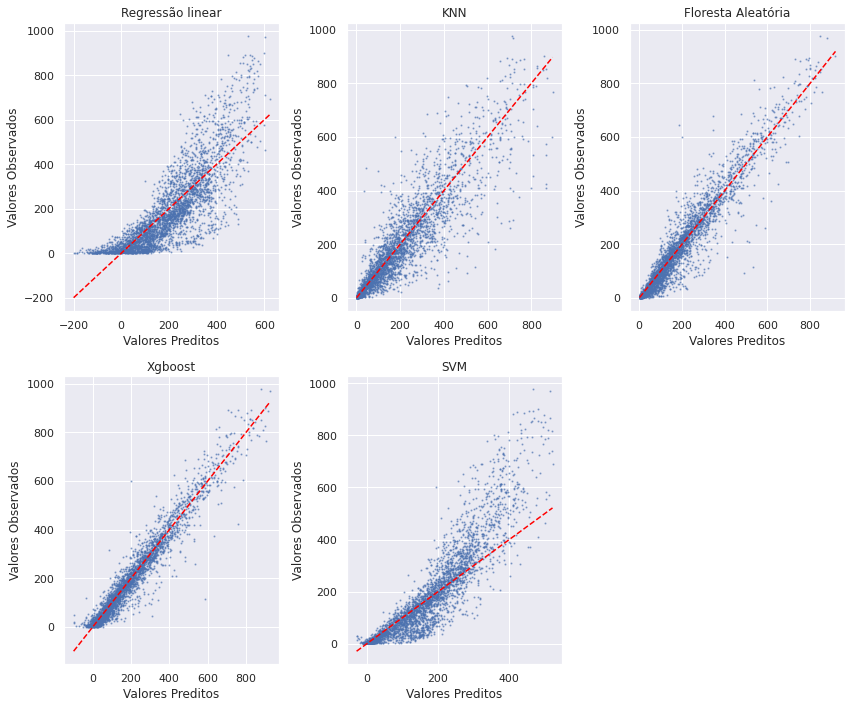

In [ ]:
# grafico de preditos contra observados para 
# os modelos mais decentes de cada classe
# reg lin, knn (k = 2, p = 1), rf, xgboost tunado, SVM
names = ["Regressão linear", "KNN", "Floresta Aleatória", "Xgboost", "SVM"]
preds_list = [lin_reg_preds, knn_p_preds, rfr_preds, predito_xgb, predito_svr_poly]
fig, axes = plt.subplots(2, 3, figsize = (12, 8))
for pred, name, ax in zip(preds_list, names, axes.flat):
  x_vals = np.linspace(min(pred), max(pred))
  y_vals = x_vals
  ax.scatter(pred, y_test, alpha = 0.5, s = 1.25)
  ax.plot(x_vals, y_vals, '--', c = "red")
  ax.set_title(name)
  ax.set_xlabel("Valores Preditos")
  ax.set_ylabel("Valores Observados")

fig.delaxes(axes[1][2])
plt.tight_layout()
plt.savefig(f"{images_dir}/all_preds_models_selec.pdf")
plt.show()

In [ ]:
# organizando os desempenhos em um data.frame
medidas_resumo = pd.DataFrame({"Modelo":names,
             "Erro médio absoluto":[mae_lin_reg, mae_knn_p_reg, mae_rfr, mae_xgb, mae_srv_poly],
             "R2":[r2_lin_reg, r2_knn_p_reg, r2_rfr, r2_xgb, r2_srv_poly]})

medidas_resumo

,Modelo,Erro médio absoluto,R2
0,Regressão linear,74.096905,0.681020
1,KNN,48.795311,0.800824
2,Floresta Aleatória,31.964927,0.916866
3,Xgboost,28.093543,0.941090
4,SVM,54.963584,0.740243
